In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

(177, 284, 3)
160
(100, 160, 3)


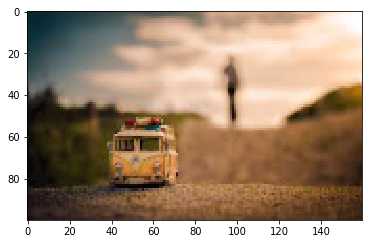

In [17]:
im = cv2.imread('/index.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(im.shape)
new_r = 100
new_c = int((im.shape[1]/im.shape[0])*new_r)
print(new_c)
img = cv2.resize(im, (new_c, new_r))
print(img.shape)
plt.imshow(img)


In [18]:
data = np.reshape(img, (-1,3))
print(data.shape)
print(data.dtype)

(16000, 3)
uint8


In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=8)

In [21]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
centroids = np.array(km.cluster_centers_, dtype=np.dtype(int))
print(centroids.shape)
print(centroids)

(8, 3)
[[ 34  31  21]
 [252 226 205]
 [165 116  74]
 [ 79  57  34]
 [236 199 170]
 [ 94 105 103]
 [126  85  47]
 [191 158 130]]


In [23]:
freq = np.unique(km.labels_, return_counts = True)
freq

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2163, 1563, 2320, 2291, 2571, 1112, 2071, 1909]))

In [24]:
color_id = freq[0][freq[1].argmax()]

most_dom_color = centroids[color_id]
print(most_dom_color)

[236 199 170]


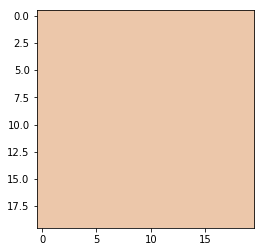

In [25]:
display_stamp = np.zeros((20,20,3) , dtype=np.dtype(int))
display_stamp[: ,: ,:] = most_dom_color

plt.imshow(display_stamp)

In [26]:
freq_ratio = freq[1]/freq[1].sum()
print(freq_ratio)

[0.1351875 0.0976875 0.145     0.1431875 0.1606875 0.0695    0.1294375
 0.1193125]


In [27]:
info = []
for ix in range(freq_ratio.shape[0]):
    item = (centroids[ix],freq_ratio[ix])
    info.append(item)
for cx in info:
    print(cx)

(array([34, 31, 21]), 0.1351875)
(array([252, 226, 205]), 0.0976875)
(array([165, 116,  74]), 0.145)
(array([79, 57, 34]), 0.1431875)
(array([236, 199, 170]), 0.1606875)
(array([ 94, 105, 103]), 0.0695)
(array([126,  85,  47]), 0.1294375)
(array([191, 158, 130]), 0.1193125)


In [28]:
sorted_values = sorted(info, key=lambda z:z[1], reverse=True)
for ix in sorted_values:
    print (ix)

(array([236, 199, 170]), 0.1606875)
(array([165, 116,  74]), 0.145)
(array([79, 57, 34]), 0.1431875)
(array([34, 31, 21]), 0.1351875)
(array([126,  85,  47]), 0.1294375)
(array([191, 158, 130]), 0.1193125)
(array([252, 226, 205]), 0.0976875)
(array([ 94, 105, 103]), 0.0695)


In [29]:
print (len(sorted_values))
print (sorted_values[3][0])

8
[34 31 21]


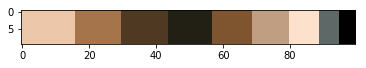

In [30]:
print_matrix = np.ones((10,100,3), dtype=np.dtype(int))
start = 0
for ix in range(len(sorted_values)):
    color = sorted_values[ix][0]
    width = int(sorted_values[ix][1]*print_matrix.shape[1])
    end = start + width
    print_matrix[:, start:end, :] =  color
    start = end
    
plt.imshow(print_matrix)
